<a href="https://colab.research.google.com/github/micd0086/RT-MICD-/blob/main/3MICD_RT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Ambiente

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import yfinance as yf

In [5]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [6]:
from datetime import date, timedelta

In [7]:
import requests

#2. Obtencion de datos

In [8]:
global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision
df_bitcoin = None
precio_actual = 0
tendencia = ""
media_bitcoin= 0.0
algoritmo_decision = ""

In [9]:
#Utiliza la biblioteca yfinance de Python para extraer el histórico de precios del Bitcoin en dólares BTC-USD, deberás extraer el histórico de los últimos 7 días en intervalos de 5 minutos, este histórico deberás guardarlo en el dataframe df_bitcoin.

In [10]:
url1 = 'https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD'
ua = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36'
r = requests.get(url1, headers={'User-Agent': ua})
indices = pd.read_html(r.text)[0]

In [11]:
def importar_base_bitcoin():

  global df_bitcoin

  bitcoin = yf.Ticker('BTC-USD')
  df_bitcoin = bitcoin.history(period='7d', interval='5m')

  return df_bitcoin

In [12]:
df_bitcoin

In [13]:
importar_base_bitcoin()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-12-02 00:00:00+00:00,38689.277344,38711.820312,38689.277344,38711.820312,0,0.0,0.0
2023-12-02 00:05:00+00:00,38712.707031,38717.660156,38700.671875,38700.671875,0,0.0,0.0
2023-12-02 00:10:00+00:00,38708.457031,38708.457031,38671.625000,38675.003906,0,0.0,0.0
2023-12-02 00:15:00+00:00,38666.070312,38670.238281,38664.390625,38670.238281,0,0.0,0.0
2023-12-02 00:20:00+00:00,38671.085938,38680.378906,38671.085938,38673.964844,1474560,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-08 03:15:00+00:00,43420.554688,43426.445312,43410.718750,43426.445312,8749056,0.0,0.0
2023-12-08 03:20:00+00:00,43428.007812,43428.007812,43407.621094,43412.171875,47196160,0.0,0.0
2023-12-08 03:25:00+00:00,43417.375000,43431.542969,43415.921875,43431.542969,54394880,0.0,0.0


In [14]:
#Web scraping para obtener el precio actual y extraer tendencias

In [15]:
import requests
res =requests.get('https://coinmarketcap.com/')
global_bitcoin = pd.read_html(res.content)
s=BeautifulSoup(res.content, features= 'lxml')
resp= s.find('div', {'class':[ 'sc-a0353bbc-0 gDrtaY', 'sc-a0353bbc-0 gDrtaY rise', 'sc-a0353bbc-0 gDrtaY fall']}).get_text()
precio_actual= float((resp).replace('$','').replace(',',''))
precio_actual

#tendencia
lista=[]
resp1 = s.findAll('span', {'class':['icon-Caret-down', 'icon-Caret-up']})
for item in resp1:
 lista.append(item)

print(lista[0])
algoritmo_decision= ''
if item(('span')==['class'][0]):
  tendencia = 'baja'
else:
   tendencia = 'alta'

tendencia

<span class="icon-Caret-up"></span>


'alta'

In [16]:
def extraer_tendencias():
  global media_bitcoin, precio_actual, algoritmo_decision, tendencia
  print('Bitcoin Price: ', precio_actual)
  print('Tendencia: ', tendencia)

extraer_tendencias()

Bitcoin Price:  43440.77
Tendencia:  alta


#3. Limpieza de datos

In [17]:
df_bitcoin_limpio = df_bitcoin

                                   Open          High           Low  \
Datetime                                                              
2023-12-02 00:00:00+00:00  38689.277344  38711.820312  38689.277344   
2023-12-02 00:05:00+00:00  38712.707031  38717.660156  38700.671875   
2023-12-02 00:10:00+00:00  38708.457031  38708.457031  38671.625000   
2023-12-02 00:15:00+00:00  38666.070312  38670.238281  38664.390625   
2023-12-02 00:20:00+00:00  38671.085938  38680.378906  38671.085938   
...                                 ...           ...           ...   
2023-12-08 03:15:00+00:00  43420.554688  43426.445312  43410.718750   
2023-12-08 03:20:00+00:00  43428.007812  43428.007812  43407.621094   
2023-12-08 03:25:00+00:00  43417.375000  43431.542969  43415.921875   
2023-12-08 03:30:00+00:00  43432.351562  43434.339844  43427.089844   
2023-12-08 03:35:00+00:00  43442.839844  43449.855469  43440.773438   

                                  Close    Volume  Dividends  Stock Splits  

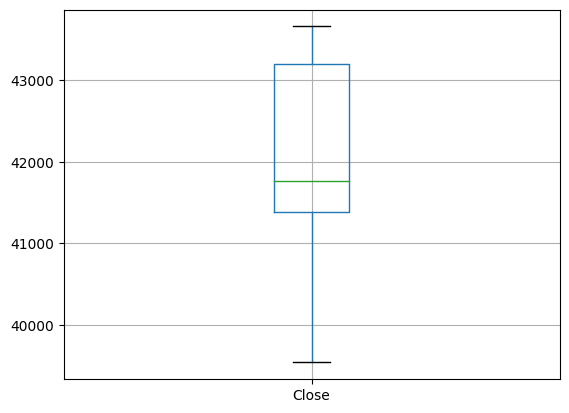

In [18]:
def limpieza_datos():
  df_bitcoin_limpio = df_bitcoin.copy()
  df_bitcoin_limpio [['Close', 'Volume']]
  df_bitcoin_limpio['Datetime'] = df_bitcoin_limpio.index
  df_bitcoin_limpio =df_bitcoin_limpio[['Datetime', 'Close', 'Volume' ]]
  df_bitcoin_limpio = df_bitcoin_limpio.set_index('Datetime')
  df_bitcoin_limpio.drop_duplicates(inplace=True)
  df_bitcoin_limpio[df_bitcoin_limpio['Close'].isnull()]
  df_bitcoin_limpio[df_bitcoin_limpio['Volume'] >= 0]
  df_bitcoin_limpio.boxplot(['Close']) #identificando los outliers
valor = df_bitcoin_limpio['Close']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1- 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ
seleccion =  ((valor>= Q1) & (valor<=Q3))
media_bitcoin = df_bitcoin_limpio[seleccion]
media_bitcoin.boxplot(['Close'])

print (df_bitcoin_limpio)

In [19]:
df_bitcoin_limpio.info() #no tengo nulos en mi df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1758 entries, 2023-12-02 00:00:00+00:00 to 2023-12-08 03:35:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1758 non-null   float64
 1   High          1758 non-null   float64
 2   Low           1758 non-null   float64
 3   Close         1758 non-null   float64
 4   Volume        1758 non-null   int64  
 5   Dividends     1758 non-null   float64
 6   Stock Splits  1758 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 109.9 KB


<Axes: >

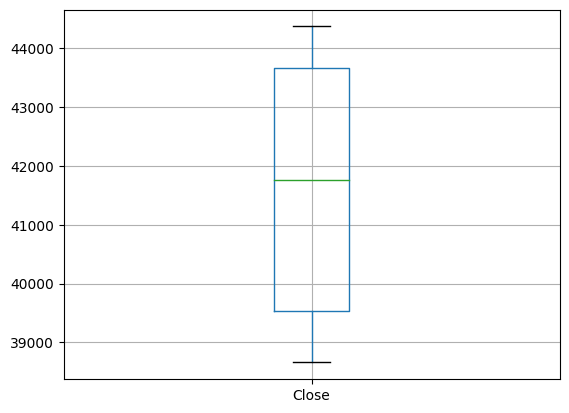

In [20]:
df_bitcoin_limpio.boxplot(['Close']) #identificando los outliers

In [21]:
media_bitcoin =df_bitcoin_limpio['Close'].mean().round(2) #calculo del precio promedio de Close
media_bitcoin

41654.59

#4. Tomar decisiones

In [22]:
def take_decision():
 global  media_bitcoin, precio_actual, algoritmo_decision
 if precio_actual > media_bitcoin:
  tendencia: 'alta'
  algoritmo_decision = 'Vender'
 if precio_actual < media_bitcoin:
  tendencia: 'baja'
  algoritmo_decision = 'Comprar'
 else:
  algoritmo_decision = 'Esperar'
 print('La decision a tomar es:', algoritmo_decision)

In [23]:
take_decision()

La decision a tomar es: Esperar


#5.Visualizacion

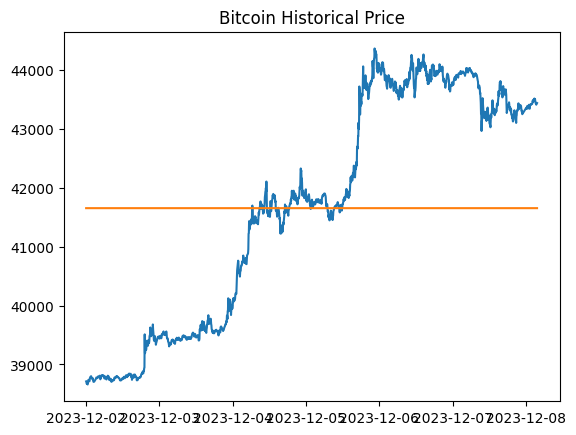

In [24]:
def visualizacion():
 global media_bitcoin, precio_actual, algoritmo_decision, tendencia
 df_bitcoin['Promedio']= media_bitcoin
 area = plt.figure()
 plt.rc('figure', figsize = (16, 5))
 datos_bitcoin = df_bitcoin.Close
 plt.title('Bitcoin Historical Price')
 plt.plot(df_bitcoin.index, df_bitcoin['Close'], label= 'Closing Price')
 plt.plot(df_bitcoin.index, df_bitcoin['Promedio'], label= 'Promedio')
 plt.show()

visualizacion()

# 6. Automatizacion

In [25]:
from IPython.display import clear_output
import time

Bitcoin Price:  43440.77
Tendencia:  alta
La decision a tomar es: Esperar


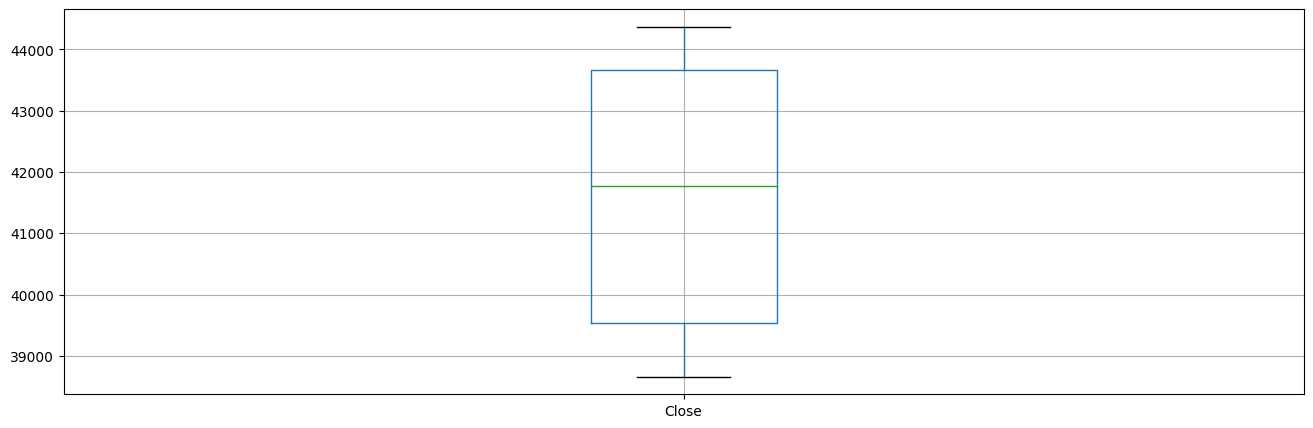

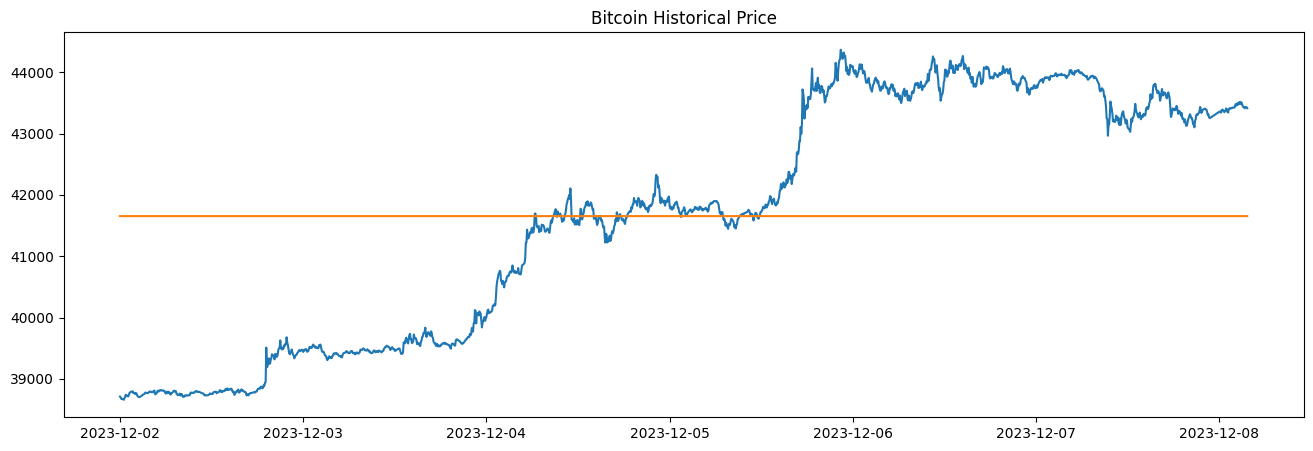

In [ ]:
while(True):
  clear_output()
  importar_base_bitcoin()
  extraer_tendencias()
  limpieza_datos()
  take_decision()
  visualizacion()
  time.sleep(300)